In [ ]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/destrieux - Copy of plots.csv')
area = list(df['area'])
lh_high_avg = np.array(df['lhhighaverage'])
lh_low_avg = np.array(df['lhlowaverage'])
rh_high_avg = np.array(df['rhhighaverage'])
rh_low_avg = np.array(df['rhlowaverage'])
lh_high_std = np.array(df['lhhighstd'])
lh_low_std = np.array(df['lhlowstd'])
rh_high_std = np.array(df['rhhighstd'])
rh_low_std = np.array(df['rhlowstd'])
lh_avg = (lh_high_avg + lh_low_avg)/2
rh_avg = (rh_high_avg + rh_low_avg)/2
lh_range = abs(lh_high_avg - lh_low_avg)
rh_range = abs(rh_high_avg - rh_low_avg)
avg_diff = lh_avg - rh_avg
range_diff = lh_range - rh_range

In [ ]:
lobe_df = pd.read_csv('/content/destrieux - lobe.csv')
lobe_ordered = list(lobe_df['lobe'])
area_ordered = list(lobe_df['area'])
lobe = []
for i in area:
    id = area_ordered.index(i)
    lobe.append(lobe_ordered[id])

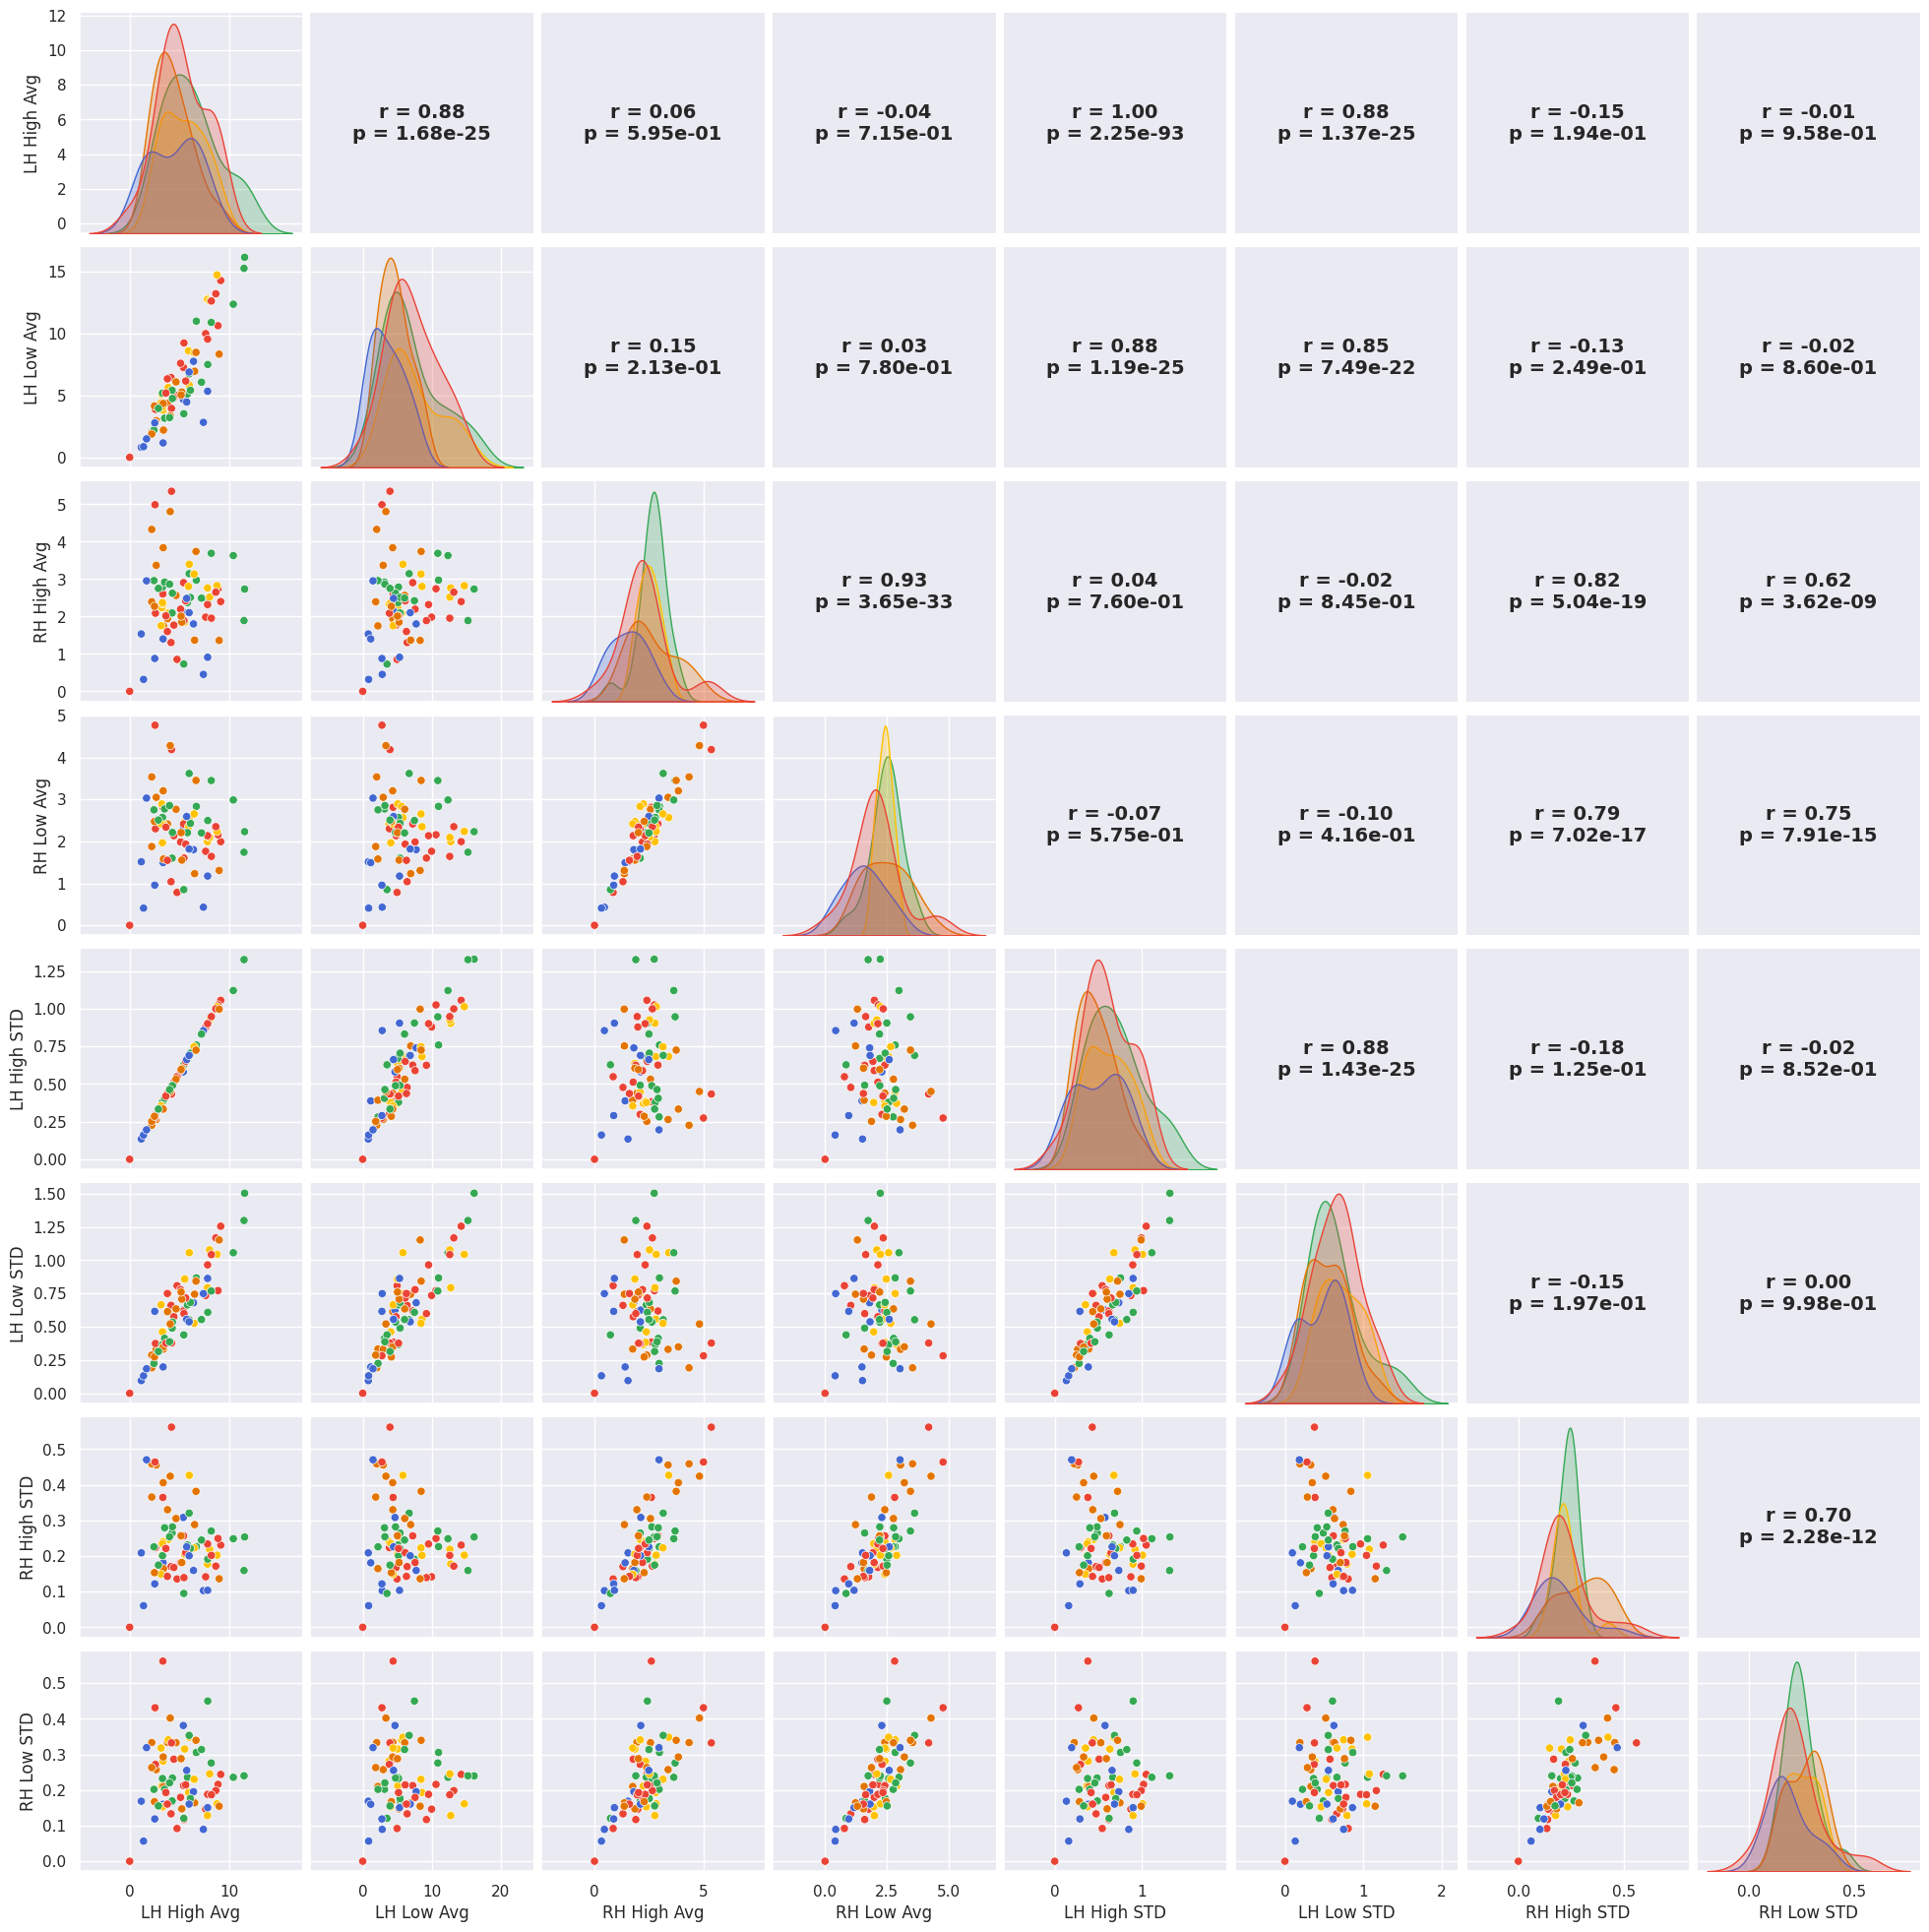

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Set the theme
sns.set_theme()

def get_rgba_value(number):
    if number == 'frontal':
        return (234/255,67/255,53/255, 255/255)
    elif number == 'parietal':
        return (227/255,116/255,0/255, 255/255)
    elif number == 'occipital':
        return (66/255,103/255,210/255, 255/255)
    elif number == 'temporal':
        return (52/255,168/255,83/255, 255/255)
    elif number == 'limbic':
        return (255/255,194/255,0/255, 255/255)
    elif number == 5:
        return (251/255,188/255,4/255,255/255)

# Create the dataframe
data = pd.DataFrame({
    'LH High Avg': lh_high_avg,
    'LH Low Avg': lh_low_avg,
    'RH High Avg': rh_high_avg,
    'RH Low Avg': rh_low_avg,
    'LH High STD': lh_high_std,
    'LH Low STD': lh_low_std,
    'RH High STD': rh_high_std,
    'RH Low STD': rh_low_std,
    'Lobe': lobe
})

# Create color mapping
unique_lobes = sorted(list(set(lobe)))
custom_colors = [get_rgba_value(lobe_val) for lobe_val in unique_lobes]
palette_dict = dict(zip(unique_lobes, custom_colors))

# Use corner=True to only draw the lower triangle (and diagonal)
g = sns.pairplot(data, hue='Lobe', palette=palette_dict, corner=False, aspect=1)

# Get the variable names (excluding 'Lobe')
vars_list = [col for col in data.columns if col != 'Lobe']

# Add correlation annotations to the upper triangle
for i in range(len(vars_list)):
    for j in range(len(vars_list)):
        if i < j:  # Upper triangle
            # Create the subplot axis manually
            ax = plt.subplot2grid((len(vars_list), len(vars_list)), (i, j))
            x_data = data[vars_list[j]]
            y_data = data[vars_list[i]]
            r, p = pearsonr(x_data, y_data)
            ax.text(0.5, 0.5, f"r = {r:.2f}\np = {p:.2e}",
                   transform=ax.transAxes,
                   ha='center', va='center',
                   fontsize=14, fontweight='bold')
            ax.set_xticks([])
            ax.set_yticks([])
            for spine in ax.spines.values():
                spine.set_visible(False)

g._legend.remove()

plt.show()